In [1]:
import math as m
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import time
import tau as spectrum
import matplotlib as ml
import matplotlib.pyplot as pp
from scipy.linalg import eigh
from matplotlib import cm
%matplotlib inline

In [2]:
n = 200
h = 1.0 / n
eps = 0.001

def Mult(A, x, n):
    res = np.zeros( n**2 )  
    for i in range(n**2):
#         print(i)
        for j in range(n**2):
#             print(j)
            res[i] += A[i][j] * x[j]
    return res

In [3]:
def showsol(sol, n):
    pp.imshow(sol.reshape((n, n)),cmap=ml.cm.Blues,interpolation='none',origin='lower')
    
    
def function(x, y):
#     return (y - 0.5)
    return 100 * m.cos(8 * m.pi * x) * (y - 0.5) 
    
def SetF(f, n):
    x = np.linspace(0.0, 1.0, num=n, endpoint=False)
    y = np.linspace(0.0, 1.0, num=n, endpoint=False)
    for i in range(n):
        for j in range(n):
            f[i * n + j] = function((x[i])**2,  y[j]) / n**2 
#             f[i * n + j] = function((x[i] + h / 2.0)**2,  y[j] + h / 2.0)
#             f[i * n + j] = m.cos(m.pi * x[i] * 10) * m.cos(m.pi * y[j] * 10) / n**2 
#             f[i * n + j] = m.cos(6 * m.pi * (x[i] + h / 2)) * m.cos(m.pi * (y[j] + h / 2)) / n**2     
            
        
def LUA(x, n, i, j):
#     print("LUA")
#     print("2 * x[{0}] - x[{1}] - x[{2}]".format(0, n, 1) )
    return 2.0 * x[0] - x[n] - x[1]

def RUA(x, n, i, j):
#     print("RUA")
#     print("2 * x[{0}] - x[{1}] - x[{2}]".format(n - 1, n + n - 1, n - 2) )
    return 2.0 * x[n - 1] - x[n + n - 1] - x[n - 2]

def LLA(x, n, i, j):
#     print("LLA")
#     print("2 * x[{0}] - x[{1}] - x[{2}]".format((n - 1) * n, (n - 2) * n, (n - 1) * n + 1) )
    return 2.0 * x[(n - 1) * n] - x[(n - 2) * n] - x[(n - 1) * n + 1]

def RLA(x, n, i, j):
#     print("RLA")
#     print("2 * x[{0}] - x[{1}] - x[{2}]".format((n - 1) * n + n - 1, (n - 2) * n + n - 1, (n - 1) * n + n - 2))
    return 2.0 * x[(n - 1) * n + n - 1] - x[(n - 2) * n + n - 1] - x[(n - 1) * n + n - 2]

def Left(x, n, i, j):
#     print("Left")
#     print("3 * x[{0}] - x[{1}] - x[{2}] - x[{3}]".format(i * n + j,i * n + j + 1,(i - 1) * n + j,(i + 1) * n + j) )     
    return 3.0 * x[i * n + j] - x[i * n + j + 1] - x[(i - 1) * n + j] - x[(i + 1) * n + j]

def Right(x, n, i, j):
#     print("Right")
#     print("3 * x[{0}] - x[{1}] - x[{2}] - x[{3}]".format(i * n + j,i * n + j - 1,(i - 1) * n + j,(i + 1) * n + j)    )  
    return 3.0 * x[i * n + j] - x[i * n + j - 1] - x[(i - 1) * n + j] - x[(i + 1) * n + j]

def Low(x, n, i, j):
#     print("Low")
#     print("3 * x[{0}] - x[{1}] - x[{2}] - x[{3}] ".format(i * n + j,(i - 1) * n + j,i* n + j - 1,i * n + j + 1)   )   
    return 3.0 * x[i * n + j] - x[(i - 1) * n + j] - x[i* n + j - 1] - x[i * n + j + 1]

def Up(x, n, i, j):
#     print("Up")
#     print("3 * x[{0}] - x[{1}] - x[{2}] - x[{3}]".format(i * n + j,(i + 1) * n + j,i* n + j - 1,i * n + j + 1)  )
    return 3.0 * x[i * n + j] - x[(i + 1) * n + j] - x[i* n + j - 1] - x[i * n + j + 1]

def Inside(x, n, i, j):
#     print("Inside")
#     print("4 * x[{0}] - x[{1}] - x[{2}] - x[{3}] - x[{4}]".format(i * n + j,(i + 1) * n + j,i* n + j - 1,i * n + j + 1, (i - 1) * n + j) ) 
    return 4.0 * x[i * n + j] - x[(i + 1) * n + j] - x[i* n + j - 1] - x[i * n + j + 1] - x[(i - 1) * n + j]

def SetFuncVec(f, n):
    A = np.zeros((n**2, n**2))
    for i in range(n):
        for j in range(n):
            id = i*n + j
            if i == 0 and j == 0:
                A[id][id] = 2.0
                A[id][id + 1] = -1.0
                A[id][id + n] = -1.0
                print(A)
                f.append(LUA)
                continue
            elif i == 0 and j in list(range(1, n - 1)):
                A[id][id] = 3.0
                A[id ][id + n] = -1.0
                A[id][id + 1] = -1.0
                A[id][id - 1] = -1.0
                f.append(Up)
                continue
            elif i == 0 and j == n - 1:
                f.append(RUA)
                A[id][id] = 2.0
                A[id][id + n] = -1.0
                A[id][id - 1] = -1.0
                continue
            elif i == n - 1 and j == 0:
                f.append(LLA)
                A[id][id] = 2.0
                A[id][id - n] = -1.0
                A[id][id + 1] = -1.0
                continue
            elif i == n - 1 and j in list(range(1, n - 1)):
                f.append(Low)
                A[id][id] = 3.0
                A[id][id - n] = -1.0
                A[id][id + 1] = -1.0
                A[id][id - 1] = -1.0
                continue
            elif i == n - 1 and j == n - 1:
                f.append(RLA)
                A[id][id] = 2.0
                A[id][id - n] = -1.0
                A[id][id - 1] = -1.0
                continue
            elif i in list(range(1, n - 1)) and j == 0:
                A[id][id] = 3.0
                A[id][id + n] = -1.0
                A[id][id - n] = -1.0
                A[id][id + 1] = -1.0
                f.append(Left)
                continue
            elif i in list(range(1, n - 1)) and j == n - 1:
                f.append(Right)
                A[id][id] = 3.0
                A[id][id + n] = -1.0
                A[id][id - n] = -1.0
                A[id][id - 1] = -1.0
                continue
            else:
                f.append(Inside)
                A[id][id] = 4.0
                A[id][id + n] = -1.0
                A[id][id - n] = -1.0
                A[id][id - 1] = -1.0
                A[id][id + 1] = -1.0
                continue
    return A
                
def Operator(f, x, n):
    res = np.zeros( n**2, dtype=float )
    
    for i in range(n):
        for j in range(n):
            res[i * n + j] = f[i * n + j](x, n, i, j)
            
    return res

def rowA(i, n):
    A = {}
    for j in [i - n, i - 1, i, i + 1, i + n]:
        if j >= n**2 or j < 0:
            continue
        if i == j and ( i % n == 0 or i % n == n - 1) and i != 0 and i != n - 1 and i != n**2 - n and i != n**2 - 1 and (i not in list(range(n**2 - n + 1, n**2 - 1))): 
            A[j] = 3.0 
            continue
        if i == j and( i in list(range(1, n - 1)) or i in list(range(n**2 - n + 1, n**2 - 1))):
            A[j] = 3.0
            continue
        elif i == j and ( i == 0 or i == n - 1 or i == n**2 - n or i == n**2 - 1):
            A[j] = 2.0  
            continue
        elif (j == i - 1 and i % n != 0) or (j == i + 1 and i % n != n - 1): 
            A[j] = -1.0 
            continue
        elif (j == i - n or j == i + n): 
            A[j] = -1.0 
            continue
        elif i == j:
            A[j] = 4.0  
            continue
    return A

def Matr(n):
    A = np.zeros((n**2, n**2))
    for i in range(n**2):
        for j in range(n**2):
            if i == j and ( i % n == 0 or i % n == n - 1) and i != 0 and i != n - 1 and i != n**2 - n and i != n**2 - 1 and (i not in list(range(n**2 - n + 1, n**2 - 1))): 
#                 print(i, ' ', j)
                A[i][j] = 3.0 
                continue
            if i == j and( i in list(range(1, n - 1)) or i in list(range(n**2 - n + 1, n**2 - 1))):
                A[i][j] = 3.0
                continue
            elif i == j and ( i == 0 or i == n - 1 or i == n**2 - n or i == n**2 - 1):
                A[i][j] = 2.0  
                continue
            elif (j == i - 1 and i % n != 0) or (j == i + 1 and i % n != n - 1): 
                A[i][j] = -1.0 
                continue
            elif (j == i - n or j == i + n): 
                A[i][j] = -1.0 
                continue
            elif i == j:
                A[i][j] = 4.0  
                continue
    for i in range(n**2):
        for j in range(n**2):
            print(A[i][j], end = ' ')
        print()
    return A

# Matr(n)

In [4]:
f = np.zeros( n**2 )
SetF(f, n)

func = []
Oper = SetFuncVec(func, n)

# print(max(abs(f)))
# print(max(abs(f*10)))

[[ 2. -1.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [5]:
M = 8 * n**2 * ((m.cos((m.pi * h) / 2.0))**1)
mu = 8 * n**2 * ((m.sin((m.pi * h) / 2.0))**1)

# print(M)
# print(mu)

# A = Matr(n)
# w = eigh(A, eigvals_only=True)
# M = max(w)
# mu = min(w)

# print(M)
# print(mu)

t1 = (M + mu) / 2.0 - ((M - mu) / 2.0) * m.cos(m.pi / (4.0))
t2 = (M + mu) / 2.0 - ((M - mu) / 2.0) * m.cos((m.pi * 3.0) / (4.0))
# M = 8 * n**2 * ((m.cos((m.pi * h) / 2.0))**2)
# mu = 8 * n**2 * ((m.sin((m.pi * h) / 2.0))**2)
# t1 = (M + mu) / 2.0 - ((M - mu) / 2.0) * m.cos(m.pi / (4.0))
# t2 = (M + mu) / 2.0 - ((M - mu) / 2.0) * m.cos((m.pi * 3.0) / (4.0))
# # print(t1)
# # print(t2)
t1 = 1.0 / t1
t2 = 1.0 / t2

print(t1)
print(t2)

# tau1, tau2 = 0.8537640310989052, 0.14648274960392202
tau1 = t1
tau2 = t2

2.0405389280886154e-05
3.656351012846535e-06


In [6]:
x1 = np.ones( n**2 )    
x_next = np.zeros( n**2 )

step = 0

start_time = time.time()
error = 10000
# eps = 1.0

for i in range(n**2):
    x1[i] = 1.0 + float(i) / float(n**2)

# for i in range(n**2):
#     x1[i] += f[i]

# eps = 0.000006

print("Error outside>> ", error)

while(error > eps):
    if(step % 2 == 0):
        tau = tau2
    else:
        tau = tau1
#     x_res = np.zeros( n**2 )
#     for i in range(n**2):
#         A = rowA(i, n)
#         for j in [i - n, i - 1, i, i + 1, i + n]:
#             try:
#                 aij = A[j]
#                 x_res[i] += aij * x1[j]
#             except:
#                 None
        
    x_next =  np.copy(x1 - tau * Operator(func, x1, n) + tau * f)
#     error = np.max(abs(x_next - x1))
#     error = LA.norm(Operator(func, x1, n) - f, axis=0)
    error = np.max(abs(Operator(func, x_next, n) - f))
#     error = LA.norm(Operator(func, x1, n) - f, axis=0)
    print("Error >> ", error)
    x1 = np.copy(x_next)
    print('iter = ', step)
    step += 1

print("--- %s seconds ---" % (time.time() - start_time))
print("|Ax - f| = ", LA.norm(Operator(func, x1, n) - f, axis=0))
print('iter = ', step)
pp.figure(figsize=(12,12))
print(np.max(abs(x1)))
print(np.min(abs(x1)))
# x1 = np.copy(x)
showsol(x1, n)

Error outside>>  10000
Error >>  0.0062249816268355705
iter =  0
Error >>  0.006224879090500814
iter =  1
Error >>  0.006224860718221339
iter =  2
Error >>  0.006224758186826187
iter =  3
Error >>  0.006224739815432003
iter =  4
Error >>  0.006224637288978232
iter =  5
Error >>  0.006224618918468896
iter =  6
Error >>  0.006224516396954507
iter =  7
Error >>  0.006224498027330241
iter =  8
Error >>  0.006224395510754568
iter =  9
Error >>  0.006224377142016482
iter =  10
Error >>  0.006224274630379969
iter =  11
Error >>  0.006224256262526286
iter =  12
Error >>  0.006224153755829156
iter =  13
Error >>  0.006224135388860321
iter =  14
Error >>  0.006224032887101907
iter =  15
Error >>  0.006224014521018364
iter =  16
Error >>  0.006223912024198221
iter =  17
Error >>  0.006223893658998638
iter =  18
Error >>  0.006223791167116768
iter =  19
Error >>  0.006223772802802476
iter =  20
Error >>  0.006223670315858656
iter =  21
Error >>  0.006223651952429212
iter =  22
Error >>  0.00622354

Error >>  0.006213280564079517
iter =  194
Error >>  0.006213178505589414
iter =  195
Error >>  0.006213160218929228
iter =  196
Error >>  0.006213058165350973
iter =  197
Error >>  0.0062130398795703055
iter =  198
Error >>  0.006212937830903455
iter =  199
Error >>  0.006212919546002307
iter =  200
Error >>  0.006212817502246195
iter =  201
Error >>  0.006212799218226119
iter =  202
Error >>  0.00621269717938119
iter =  203
Error >>  0.006212678896239967
iter =  204
Error >>  0.006212576862305554
iter =  205
Error >>  0.006212558580044738
iter =  206
Error >>  0.00621245655102062
iter =  207
Error >>  0.006212438269638878
iter =  208
Error >>  0.006212336245525054
iter =  209
Error >>  0.006212317965023275
iter =  210
Error >>  0.006212215945818635
iter =  211
Error >>  0.006212197666196819
iter =  212
Error >>  0.006212095651901586
iter =  213
Error >>  0.006212077373159288
iter =  214
Error >>  0.006211975363773239
iter =  215
Error >>  0.00621195708591046
iter =  216
Error >>  0.0

Error >>  0.0062016522021270636
iter =  387
Error >>  0.006201633999711489
iter =  388
Error >>  0.0062015324162855955
iter =  389
Error >>  0.00620151421474421
iter =  390
Error >>  0.006201412636201522
iter =  391
Error >>  0.006201394435536103
iter =  392
Error >>  0.006201292861875731
iter =  393
Error >>  0.0062012746620845015
iter =  394
Error >>  0.006201173093306669
iter =  395
Error >>  0.006201154894390961
iter =  396
Error >>  0.006201053330495667
iter =  397
Error >>  0.006201035132454371
iter =  398
Error >>  0.00620093357344095
iter =  399
Error >>  0.006200915376274509
iter =  400
Error >>  0.006200813822142517
iter =  401
Error >>  0.00620079562585071
iter =  402
Error >>  0.006200694076600812
iter =  403
Error >>  0.006200675881183861
iter =  404
Error >>  0.006200574336814726
iter =  405
Error >>  0.0062005561422719645
iter =  406
Error >>  0.006200454602784036
iter =  407
Error >>  0.00620043640911502
iter =  408
Error >>  0.006200334874507631
iter =  409
Error >>  0

KeyboardInterrupt: 

In [ ]:
aii = 0
cij = 0
d = 0
step = 0
# eps = 0.01

start_time = time.time()
iterId = 0

x2 = np.ones( n**2 )   
x_prev = np.zeros( n**2 )

# for i in range(n**2):
#     x2[i] += f[i]
# eps = 0.001

for i in range(n**2):
    x2[i] = 1.0 + float(i) / float(n**2)

error = 10000

while(error > eps):
    x_prev = np.copy(x2)
    for i in range(n**2):
        val = 0.0
        A = rowA(i, n)
        aii = A[i]
        for j in [i - n, i - 1, i + 1, i + n]:
            try:
                aij = A[j]
                val += aij * x2[j]
            except:
                None
        x2[i] = (f[i] - val) / aii
        
    error = np.max(abs(Operator(func, x2, n) - f))
#     error = np.max(abs(x_prev - x2))
    print("Error >> ", error)
    step += 1
    
print("--- %s seconds ---" % (time.time() - start_time))
print("|Ax - f| = ", LA.norm(Operator(func, x2, n) - f, axis=0))
print('iter = ', step)
pp.figure(figsize=(12,12))

print(max(abs(x2)))
print(min(abs(x2)))
showsol(x2, n)

In [ ]:
print(max(abs(f)))

In [ ]:
LA.norm(x1-x2)

In [ ]:
np.max(abs(Operator(func, x1, n) - f)) * h

In [ ]:
np.max(abs(Operator(func, x2, n) - f)) * h

In [66]:
x1 = np.ones( n**2 )   
x2 = np.ones( n**2 ) 
A = Matr(n)

for i in range(n**2):
    x1[i] = 1.0 + float(i) * 0.6
    x2[i] = 1.0 + float(i) * 0.6
    


KeyboardInterrupt: 

In [ ]:
while(True):
    x1_next = np.copy(Mult(A, x1, n))
    x2_next  = np.copy(Mult(Oper, x2, n))
#     print(x1_next)
#     print(x2_next)
    print(x1_next == x2_next)
    print(LA.norm(x1_next-x2_next))
    x1 = np.copy(x1_next)
    x2 = np.copy(x2_next)
    input()

In [ ]:
Mult(A, x1, n)

In [ ]:
for i in range(n**2):
    for j in range(n**2):
        print(Oper[i][j], end = ' ')
    print()

In [ ]:
Oper == A

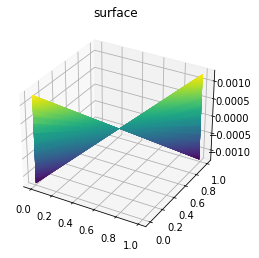

In [22]:
t = np.linspace(0.0, 1.0, num=n, endpoint=False)
s = np.linspace(0.0, 1.0, num=n, endpoint=False)

ax = plt.axes(projection='3d')
ax.plot_surface(t, s, f.reshape((n, n)), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');


In [19]:
x1.reshape((n, n))

array([[0.9998169 , 0.99981873, 0.99982056, ..., 1.00017761, 1.00017944,
        1.00018127],
       [0.9998169 , 0.99981873, 0.99982056, ..., 1.00017761, 1.00017944,
        1.00018127],
       [0.9998169 , 0.99981873, 0.99982056, ..., 1.00017761, 1.00017944,
        1.00018127],
       ...,
       [0.99986582, 0.99986716, 0.9998685 , ..., 1.00013016, 1.0001315 ,
        1.00013284],
       [0.99983932, 0.99984093, 0.99984254, ..., 1.00015586, 1.00015746,
        1.00015907],
       [0.99982262, 0.99982439, 0.99982617, ..., 1.00017206, 1.00017383,
        1.00017561]])